### Importing Libs

In [8]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import feature_column as fc
from tensorflow.keras import layers

### Importing Data

In [5]:
housing_df = pd.read_csv("../datasets/housing_pre-proc.csv", on_bad_lines="skip")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Splitting Data

In [10]:
train, test = train_test_split(housing_df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

print(len(train), "train examples")
print(len(val), "validation examples")
print(len(test), "test examples")

13076 train examples
3270 validation examples
4087 test examples


In [12]:
train.to_csv("../datasets/housing-train.csv", encoding="utf-8", index=False)

In [13]:
val.to_csv("../datasets/housing-val.csv", encoding="utf-8", index=False)

In [14]:
test.to_csv("../datasets/housing-test.csv", encoding="utf-8", index=False)

### Input pipeline

In [16]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop("median_house_value")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [17]:
batch_size = 32
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)

In [18]:
for feature_batch, label_batch in train_ds.take(1):
    print("Every feature:", list(feature_batch.keys()))
    print("A batch of households:", feature_batch["households"])
    print("A batch of ocean_proximity:", feature_batch["ocean_proximity"])
    print("A batch of targets:", label_batch)

Every feature: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
A batch of households: tf.Tensor(
[381. 335. 484. 778. 841. 669. 689. 433. 988. 228. 324. 470. 325. 316.
 166. 384. 292. 284. 202. 571. 666. 627. 342. 538. 199. 428. 919. 766.
 474. 477. 155. 290.], shape=(32,), dtype=float64)
A batch of ocean_proximity: tf.Tensor(
[b'NEAR OCEAN' b'INLAND' b'<1H OCEAN' b'INLAND' b'<1H OCEAN' b'NEAR BAY'
 b'<1H OCEAN' b'<1H OCEAN' b'<1H OCEAN' b'INLAND' b'<1H OCEAN'
 b'<1H OCEAN' b'<1H OCEAN' b'INLAND' b'NEAR BAY' b'<1H OCEAN' b'INLAND'
 b'<1H OCEAN' b'NEAR BAY' b'NEAR OCEAN' b'<1H OCEAN' b'INLAND'
 b'<1H OCEAN' b'NEAR BAY' b'INLAND' b'<1H OCEAN' b'INLAND' b'INLAND'
 b'INLAND' b'<1H OCEAN' b'INLAND' b'NEAR OCEAN'], shape=(32,), dtype=string)
A batch of targets: tf.Tensor(
[129700. 119800. 500001.  88300. 248300. 475000. 123800. 120400. 391200.
 193800. 394900. 159500. 254400.  59100. 207100. 2792

2023-05-18 21:44:25.144377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype double and shape [13076]
	 [[{{node Placeholder/_9}}]]
2023-05-18 21:44:25.144989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype double and shape [13076]
	 [[{{node Placeholder/_9}}]]


In [19]:
numeric_cols = [
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
]

In [20]:
def get_scal(feature):
    def minmax(x):
        mini = train[feature].min()
        maxi = train[feature].max()
        return (x - mini) / (maxi - mini)

    return minmax

In [21]:
feature_columns = []
for header in numeric_cols:
    scal_input_fn = get_scal(header)
    feature_columns.append(
        fc.numeric_column(header, normalizer_fn=scal_input_fn)
    )

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [22]:
print("Total number of feature columns: ", len(feature_columns))

Total number of feature columns:  8


### Training pipeline

In [26]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns, dtype="float64")

model = tf.keras.Sequential(
    [
        feature_layer,
        layers.Dense(12, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1, activation="linear", name="median_house_value"),
    ]
)

model.compile(optimizer="adam", loss="mse", metrics=["mse"])

history = model.fit(train_ds, validation_data=val_ds, epochs=32)

Epoch 1/32


2023-05-18 21:47:17.071262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype double and shape [13076]
	 [[{{node Placeholder/_8}}]]
2023-05-18 21:47:17.072026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_6' with dtype double and shape [13076]
	 [[{{node Placeholder/_6}}]]


401/409 [============================>.] - ETA: 0s - loss: 55934631936.0000 - mse: 55934631936.0000WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor. Received: inputs={'longitude': <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=float64>, 'latitude': <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=float64>, 'housing_median_age': <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=float64>, 'total_rooms': <tf.Tensor 'IteratorGetNext:8' shape=(None,) dtype=float64>, 'total_bedrooms': <tf.Tensor 'IteratorGetNext:7' shape=(None,) dtype=float64>, 'population': <tf.Tensor 'IteratorGetNext:6' shape=(None,) dtype=float64>, 'households': <tf.Tensor 'IteratorGetNext:0' shape=(None,) dtype=float64>, 'median_income': <tf.Tensor 'IteratorGetNext:4' shape=(None,) dtype=float64>, 'ocean_proximity': <tf.Tensor 'IteratorGetNext:5' shape=(None,) dtype=string>}. Consider rewriting this model with the Functional API.


2023-05-18 21:47:18.659572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype double and shape [3270]
	 [[{{node Placeholder/_9}}]]


409/409 [==============================] - 2s 3ms/step - loss: 55987236864.0000 - mse: 55987236864.0000 - val_loss: 57273798656.0000 - val_mse: 57273798656.0000
Epoch 2/32
409/409 [==============================] - 1s 2ms/step - loss: 55939514368.0000 - mse: 55939514368.0000 - val_loss: 57172815872.0000 - val_mse: 57172815872.0000
Epoch 3/32
409/409 [==============================] - 1s 2ms/step - loss: 55762350080.0000 - mse: 55762350080.0000 - val_loss: 56908640256.0000 - val_mse: 56908640256.0000
Epoch 4/32
409/409 [==============================] - 1s 2ms/step - loss: 55398948864.0000 - mse: 55398948864.0000 - val_loss: 56428740608.0000 - val_mse: 56428740608.0000
Epoch 5/32
409/409 [==============================] - 1s 2ms/step - loss: 54794506240.0000 - mse: 54794506240.0000 - val_loss: 55691780096.0000 - val_mse: 55691780096.0000
Epoch 6/32
409/409 [==============================] - 1s 2ms/step - loss: 53930512384.0000 - mse: 53930512384.0000 - val_loss: 54689107968.0000 - val_m

In [27]:
loss, mse = model.evaluate(train_ds)
print("Mean Squared Error", mse)

409/409 [==============================] - 1s 2ms/step - loss: 11989786624.0000 - mse: 11989786624.0000
Mean Squared Error 11989786624.0


In [29]:
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):
        ax = fig.add_subplot(nrows, ncols, idx + 1)
        plt.plot(history.history[key])
        plt.plot(history.history[f"val_{key}"])
        plt.title(f"model {key}")
        plt.ylabel(key)
        plt.xlabel("epoch")
        plt.legend(["train", "validation"], loc="upper left");


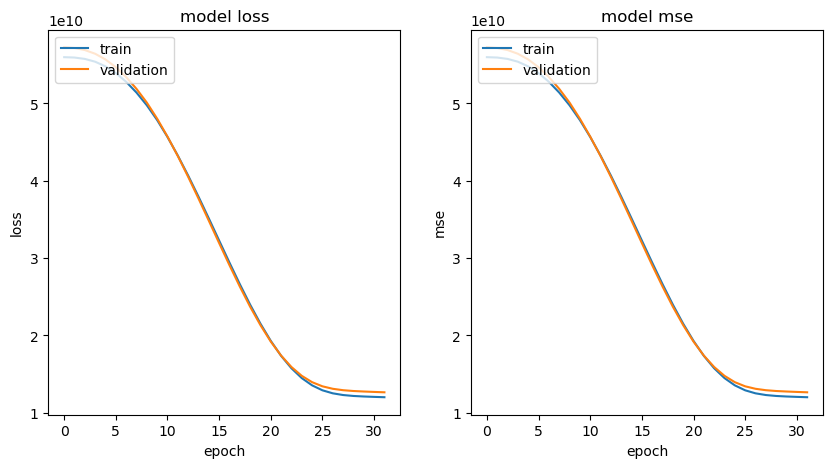

In [30]:
plot_curves(history, ["loss", "mse"])

### Inference

In [33]:
test_data = pd.read_csv("../datasets/housing-test.csv")
test_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,-119.571150,35.635486,28.301199,2681.711769,549.207732,1454.778077,510.865427,3.893144,206285.705897
std,2.001987,2.147947,12.645165,2214.885366,439.090422,1206.447712,402.513817,1.888429,114198.600470
min,-124.300000,32.540000,2.000000,16.000000,3.000000,8.000000,2.000000,0.499900,14999.000000
25%,-121.820000,33.940000,18.000000,1451.000000,293.000000,788.000000,278.000000,2.601750,120650.000000
50%,-118.490000,34.260000,28.000000,2163.000000,439.000000,1175.000000,411.000000,3.565200,178600.000000
75%,-118.010000,37.730000,37.000000,3187.500000,654.500000,1757.000000,613.500000,4.784900,264550.000000
max,-114.550000,41.810000,52.000000,32627.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


In [34]:
def test_input_fn(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

In [35]:
test_predict = test_input_fn(dict(test_data))

In [36]:
predicted_median_house_value = model.predict(test_predict)

 1/16 [>.............................] - ETA: 2s

2023-05-18 21:48:38.829473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype double and shape [4087]
	 [[{{node Placeholder/_3}}]]


16/16 [==============================] - 0s 2ms/step


In [37]:
model.predict(
    {
        "longitude": tf.convert_to_tensor([-121.86]),
        "latitude": tf.convert_to_tensor([39.78]),
        "housing_median_age": tf.convert_to_tensor([12.0]),
        "total_rooms": tf.convert_to_tensor([7653.0]),
        "total_bedrooms": tf.convert_to_tensor([1578.0]),
        "population": tf.convert_to_tensor([3628.0]),
        "households": tf.convert_to_tensor([1494.0]),
        "median_income": tf.convert_to_tensor([3.0905]),
        "ocean_proximity": tf.convert_to_tensor(["INLAND"]),
    },
    steps=1,
)

1/1 [==============================] - 0s 164ms/step


array([[233775.94]], dtype=float32)

In [38]:
model.predict(
    {
        "longitude": tf.convert_to_tensor([-122.43]),
        "latitude": tf.convert_to_tensor([37.63]),
        "housing_median_age": tf.convert_to_tensor([34.0]),
        "total_rooms": tf.convert_to_tensor([4135.0]),
        "total_bedrooms": tf.convert_to_tensor([687.0]),
        "population": tf.convert_to_tensor([2154.0]),
        "households": tf.convert_to_tensor([742.0]),
        "median_income": tf.convert_to_tensor([4.9732]),
        "ocean_proximity": tf.convert_to_tensor(["NEAR OCEAN"]),
    },
    steps=1,
)

1/1 [==============================] - 0s 23ms/step


array([[224879.9]], dtype=float32)

### Engineer features

In [40]:
numeric_cols = [
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
]

bucketized_cols = ["housing_median_age"]

categorical_cols = ["ocean_proximity"]

In [41]:
def get_scal(feature):
    def minmax(x):
        mini = train[feature].min()
        maxi = train[feature].max()
        return (x - mini) / (maxi - mini)

    return minmax

In [42]:
feature_columns = []
for header in numeric_cols:
    scal_input_fn = get_scal(header)
    feature_columns.append(
        fc.numeric_column(header, normalizer_fn=scal_input_fn)
    )

In [43]:
for feature_name in categorical_cols:
    vocabulary = housing_df[feature_name].unique()
    categorical_c = fc.categorical_column_with_vocabulary_list(
        feature_name, vocabulary
    )
    one_hot = fc.indicator_column(categorical_c)
    feature_columns.append(one_hot)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [44]:
age = fc.numeric_column("housing_median_age")

age_buckets = fc.bucketized_column(
    age, boundaries=[10, 20, 30, 40, 50, 60, 80, 100]
)
feature_columns.append(age_buckets)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [45]:
vocabulary = housing_df["ocean_proximity"].unique()
ocean_proximity = fc.categorical_column_with_vocabulary_list(
    "ocean_proximity", vocabulary
)

crossed_feature = fc.crossed_column(
    [age_buckets, ocean_proximity], hash_bucket_size=1000
)
crossed_feature = fc.indicator_column(crossed_feature)
feature_columns.append(crossed_feature)

Instructions for updating:
Use `tf.keras.layers.experimental.preprocessing.HashedCrossing` instead for feature crossing when preprocessing data to train a Keras model.


In [47]:
print("Total number of feature columns: ", len(feature_columns))

Total number of feature columns:  11


In [48]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns, dtype="float64")

model = tf.keras.Sequential(
    [
        feature_layer,
        layers.Dense(12, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1, activation="linear", name="median_house_value"),
    ]
)

model.compile(optimizer="adam", loss="mse", metrics=["mse"])

history = model.fit(train_ds, validation_data=val_ds, epochs=32)

Epoch 1/32
409/409 [==============================] - 3s 4ms/step - loss: 55982014464.0000 - mse: 55982014464.0000 - val_loss: 57256562688.0000 - val_mse: 57256562688.0000
Epoch 2/32
409/409 [==============================] - 1s 3ms/step - loss: 55894540288.0000 - mse: 55894540288.0000 - val_loss: 57089757184.0000 - val_mse: 57089757184.0000
Epoch 3/32
409/409 [==============================] - 2s 4ms/step - loss: 55620616192.0000 - mse: 55620616192.0000 - val_loss: 56691634176.0000 - val_mse: 56691634176.0000
Epoch 4/32
409/409 [==============================] - 1s 3ms/step - loss: 55087140864.0000 - mse: 55087140864.0000 - val_loss: 56008048640.0000 - val_mse: 56008048640.0000
Epoch 5/32
409/409 [==============================] - 1s 3ms/step - loss: 54255378432.0000 - mse: 54255378432.0000 - val_loss: 55011110912.0000 - val_mse: 55011110912.0000
Epoch 6/32
409/409 [==============================] - 1s 3ms/step - loss: 53106077696.0000 - mse: 53106077696.0000 - val_loss: 53690761216.0

In [49]:
loss, mse = model.evaluate(train_ds)
print("Mean Squared Error", mse)

409/409 [==============================] - 1s 2ms/step - loss: 10453008384.0000 - mse: 10453008384.0000
Mean Squared Error 10453008384.0


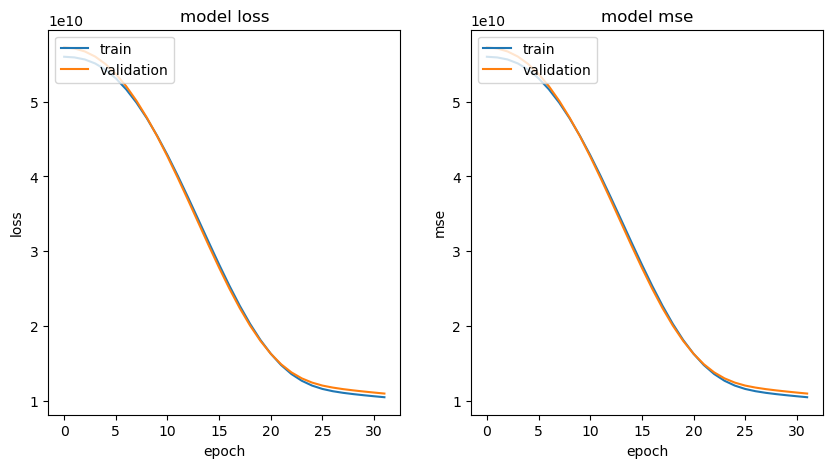

In [50]:
plot_curves(history, ["loss", "mse"])

In [51]:
model.predict(
    {
        "longitude": tf.convert_to_tensor([-122.43]),
        "latitude": tf.convert_to_tensor([37.63]),
        "housing_median_age": tf.convert_to_tensor([34.0]),
        "total_rooms": tf.convert_to_tensor([4135.0]),
        "total_bedrooms": tf.convert_to_tensor([687.0]),
        "population": tf.convert_to_tensor([2154.0]),
        "households": tf.convert_to_tensor([742.0]),
        "median_income": tf.convert_to_tensor([4.9732]),
        "ocean_proximity": tf.convert_to_tensor(["NEAR OCEAN"]),
    },
    steps=1,
)

1/1 [==============================] - 0s 185ms/step


array([[234185.05]], dtype=float32)